To allow inline pictures, run the following block

In [1]:
%matplotlib inline

Import the useful libraries

In [2]:
import numpy as np
import scipy as sp
import pandas as pd
import matplotlib.pyplot as plt
import math
colors = ['red', 'green', 'blue', 'purple', 'slategrey', 'brown', 'darkorange', 'black', 'red', 'green', 'blue', 'purple', 'slategrey', 'brown', 'darkorange', 'black']

Data to read

In [3]:
dataPath = './'
dataFile = 'ExperimentsTreated.xlsx'

To be sure that the **Experiments.xlsx** file is in the current directory, run the following block by clicking CTRL+ENTER

In [4]:
import os
print("List of files of directory:", os.path.abspath(os.getcwd()+'/'+dataPath))
os.listdir(os.getcwd()+'/'+dataPath)

List of files of directory: /home/pantale/SynologyDrive/Programming/Python/ANN-ConstitutiveLaw/ANN-Zhou-Law


['NN-3-5-1-tanh-2.svg',
 'Convergence.svg',
 'OriginalData-T-900.svg',
 'NN-3-5-1-tanh-1.svg',
 'OriginalData-T-800.svg',
 'OriginalData-T-850.svg',
 'ExperimentsTreated.xlsx',
 'NN-3-7-1-tanh-1.svg',
 'OriginalData-epsp-0.1.svg',
 'NN-3-7-1-tanh-2.svg',
 'Learning.ipynb',
 'OriginalData-T-750.svg',
 'NN-3-9-1-tanh-2.svg',
 'OriginalData-T-1300.svg',
 'OriginalData-T-950.svg',
 'OriginalData-T-1000.svg',
 'OriginalData-epsp-0.001.svg',
 'OriginalData-epsp-0.01.svg',
 'OriginalData-T-1100.svg',
 'OriginalData-T-1050.svg',
 'NN-3-9-1-tanh-1.svg',
 'OriginalData-T-1150.svg',
 'Untitled.ipynb',
 'OriginalData-T-1200.svg',
 'OriginalData-T-1250.svg',
 '.ipynb_checkpoints']

Read the content of the Excel file using the pandas library method read_excel.

In [5]:
excelData = pd.read_excel(dataPath+'/'+dataFile, None)

Extract list of temperatures from the name of sheets

In [6]:
len(excelData)
temperatures = []
temps = list(excelData.keys())
for T in temps:
    temperatures.append(int(T.replace('°C','')))
temperaturesOrig = temperatures
nTemp = len(temperatures)
nTemp, temperatures

(12, [750, 800, 850, 900, 950, 1000, 1050, 1100, 1150, 1200, 1250, 1300])

Get the values of epsp

In [7]:
dataSheet = excelData[str(temperatures[0])+'°C']
epsp = []
for i in range(1, dataSheet.shape[1]):
    epsp.append(dataSheet.columns[i])
epspOrig = epsp
nEpsp = len(epsp)
nEpsp, epsp

(3, [0.001, 0.01, 0.1])

Extract data from the panda sheets

In [8]:
# Read first sheet
dataSheet = excelData[str(temperatures[0])+'°C']
data = dataSheet.values
eps = data[:,0]
sig = data[:,1:]
# Append the other sheets
for T in temperatures[1:]:
    dataSheet = excelData[str(T)+'°C']
    data = dataSheet.values
    sig = np.append(sig, data[:,1:], axis=1)
nEps = len(eps)

In [9]:
temperatures = np.array(temperatures)
epsp = np.array(epsp)
epsp = np.log(epsp/epsp.min())
epspArray = np.tile(epsp,temperatures.shape[0])
temperaturesArray = temperatures.repeat(epsp.shape[0])
epspArray, temperaturesArray

(array([0.        , 2.30258509, 4.60517019, 0.        , 2.30258509,
        4.60517019, 0.        , 2.30258509, 4.60517019, 0.        ,
        2.30258509, 4.60517019, 0.        , 2.30258509, 4.60517019,
        0.        , 2.30258509, 4.60517019, 0.        , 2.30258509,
        4.60517019, 0.        , 2.30258509, 4.60517019, 0.        ,
        2.30258509, 4.60517019, 0.        , 2.30258509, 4.60517019,
        0.        , 2.30258509, 4.60517019, 0.        , 2.30258509,
        4.60517019]),
 array([ 750,  750,  750,  800,  800,  800,  850,  850,  850,  900,  900,
         900,  950,  950,  950, 1000, 1000, 1000, 1050, 1050, 1050, 1100,
        1100, 1100, 1150, 1150, 1150, 1200, 1200, 1200, 1250, 1250, 1250,
        1300, 1300, 1300]))

In [10]:
entries = np.empty([epspArray.shape[0]*eps.shape[0], 4])
row = 0
colEps = 0
colEpsp = 1
colT = 2
colSig = 3
for i in range(epspArray.shape[0]):
    for j in range(eps.shape[0]):
        entries[row, colEps] = eps[j]
        entries[row, colEpsp] = epspArray[i]
        entries[row, colT] = temperaturesArray[i]
        entries[row, colSig] = sig[j,i]
        row += 1
entries

array([[0.00000000e+00, 0.00000000e+00, 7.50000000e+02, 6.99834514e+01],
       [1.00000000e-02, 0.00000000e+00, 7.50000000e+02, 9.60864812e+01],
       [2.00000000e-02, 0.00000000e+00, 7.50000000e+02, 1.31832831e+02],
       ...,
       [6.80000000e-01, 4.60517019e+00, 1.30000000e+03, 1.51180311e+01],
       [6.90000000e-01, 4.60517019e+00, 1.30000000e+03, 1.51314594e+01],
       [7.00000000e-01, 4.60517019e+00, 1.30000000e+03, 1.51502250e+01]])

In [11]:
maxEntries = entries.max(axis=0)
maxEntries

array([7.00000000e-01, 4.60517019e+00, 1.30000000e+03, 3.06095599e+02])

In [12]:
NNentries = entries / np.array(maxEntries)
NNentries

array([[0.        , 0.        , 0.57692308, 0.22863266],
       [0.01428571, 0.        , 0.57692308, 0.31391004],
       [0.02857143, 0.        , 0.57692308, 0.43069169],
       ...,
       [0.97142857, 1.        , 1.        , 0.0493899 ],
       [0.98571429, 1.        , 1.        , 0.04943377],
       [1.        , 1.        , 1.        , 0.04949508]])

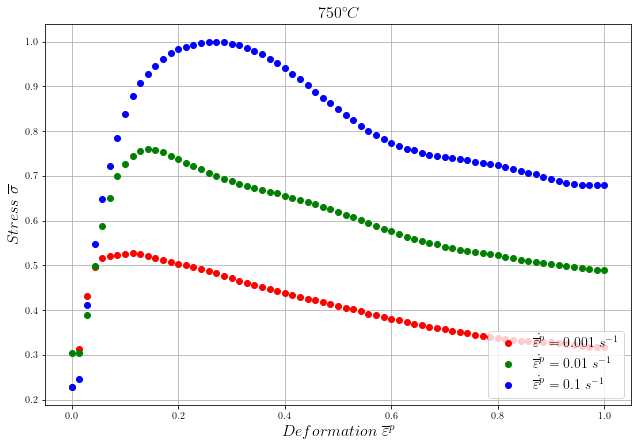

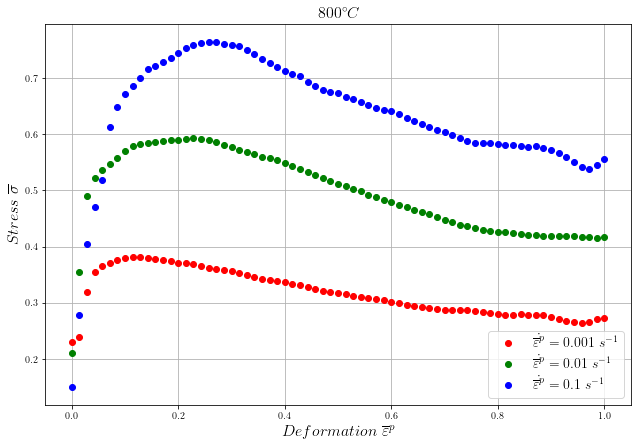

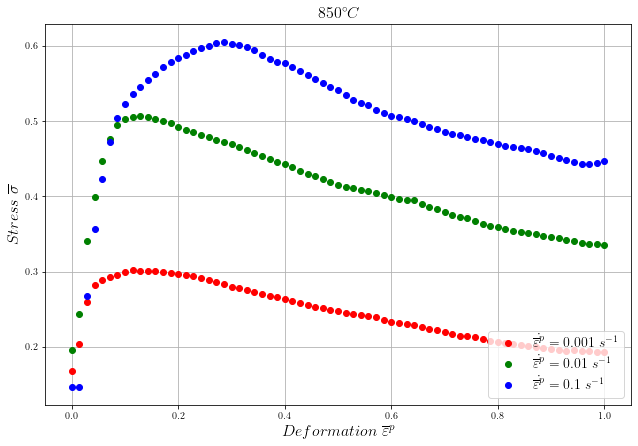

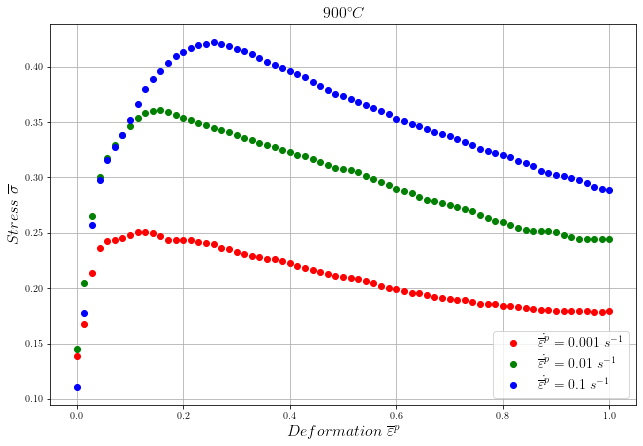

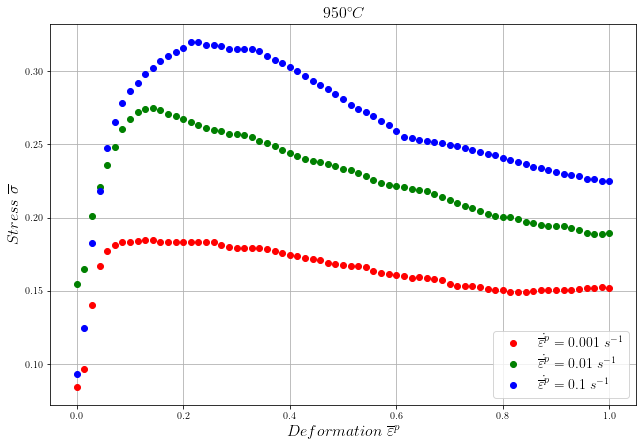

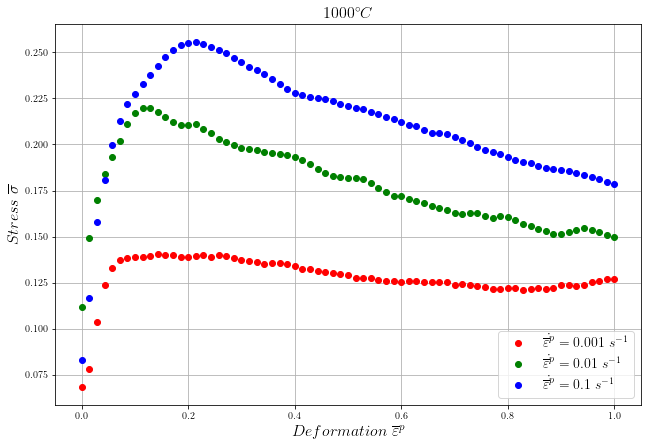

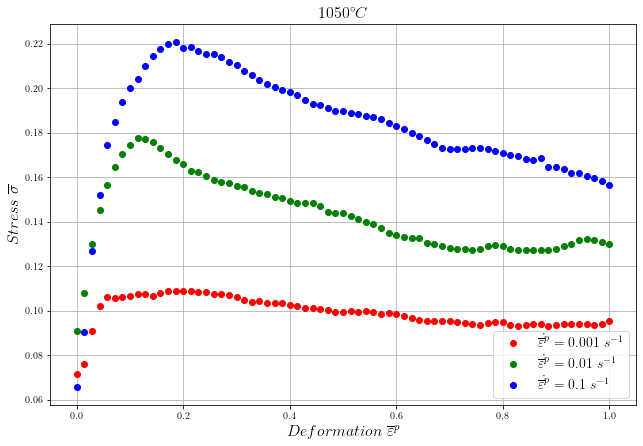

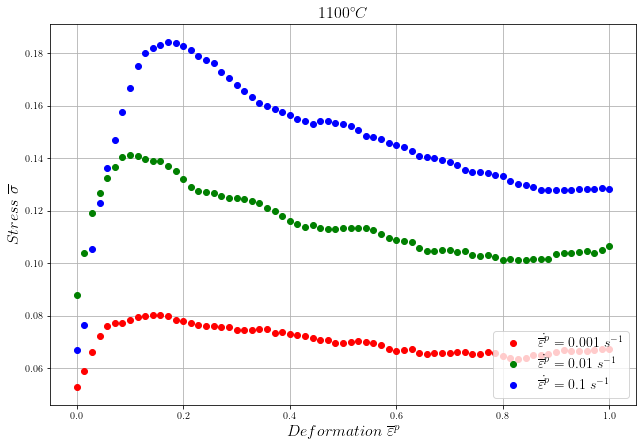

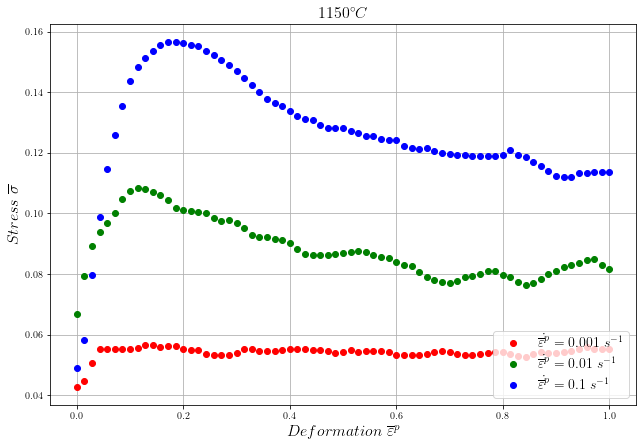

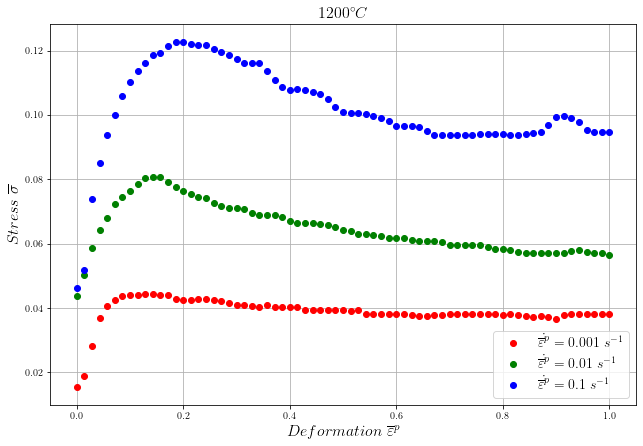

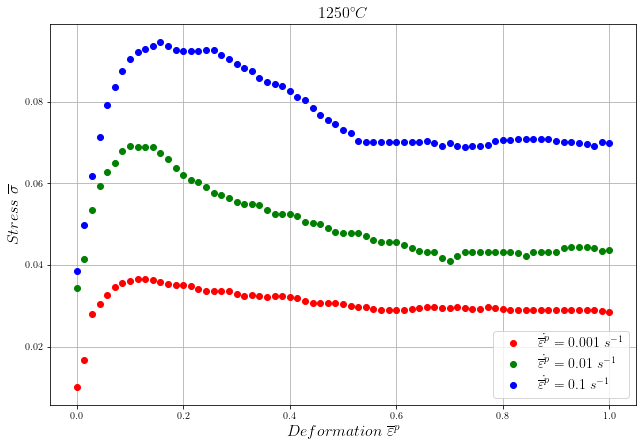

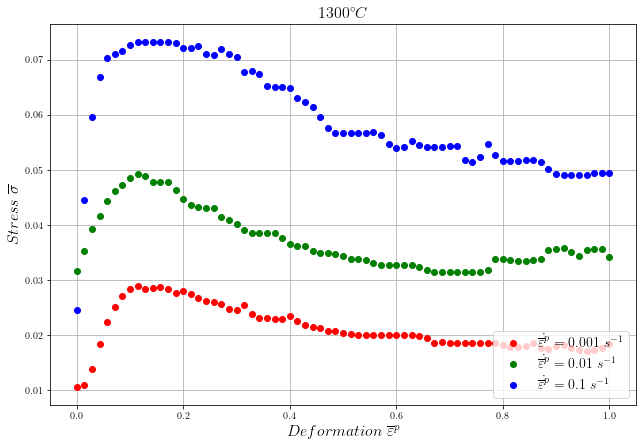

In [13]:
for T in temperatures:
    plt.figure(figsize = (10.5, 7))
    plt.rc('text', usetex = True)
    cl = 0
    for epspv, epspvv in zip(epsp, epspOrig):
        # filter on T
        data = NNentries[(entries[:,colT]==T) & (entries[:,colEpsp]==epspv), :]
        # Plot the curves
        plt.plot(data[:,colEps], data[:,colSig], colors[cl], label=r'$\dot{\overline{\varepsilon}^p}=' + str(epspvv) + '\ s^{-1}$', marker = 'o', linestyle='none')
        cl += 1
    plt.legend(loc = 'lower right',fancybox = True, numpoints = 1, fontsize = 14)
    plt.grid() # Plot the grid with default size
    plt.xlabel(r'$Deformation\ \overline{\varepsilon}^{p}$', fontsize = 16) # Labels the x axis
    plt.ylabel(r'$Stress\ \overline{\sigma}$', fontsize = 16) # Labels the y axis
    plt.title(r'$' + str(T) + '^{\circ}C$', fontsize = 16) # Self explicit command
    plt.savefig('OriginalData-T-'+str(T)+'.svg', bbox_inches = 'tight', pad_inches = 0)
    plt.show()

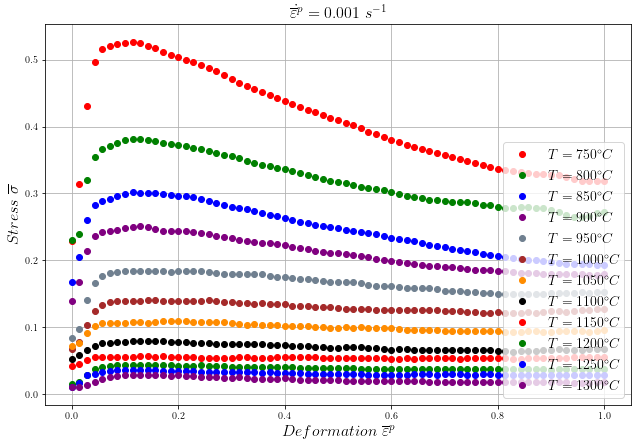

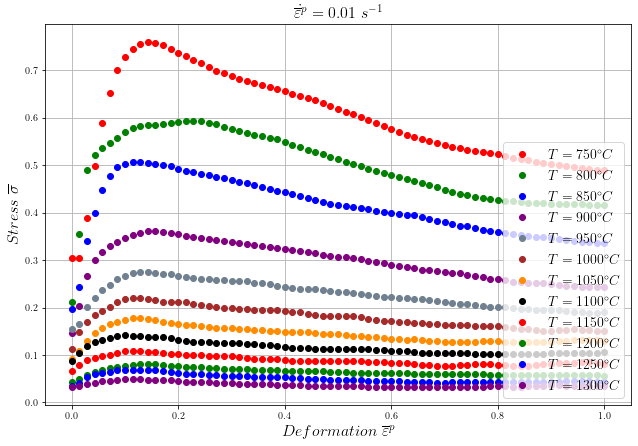

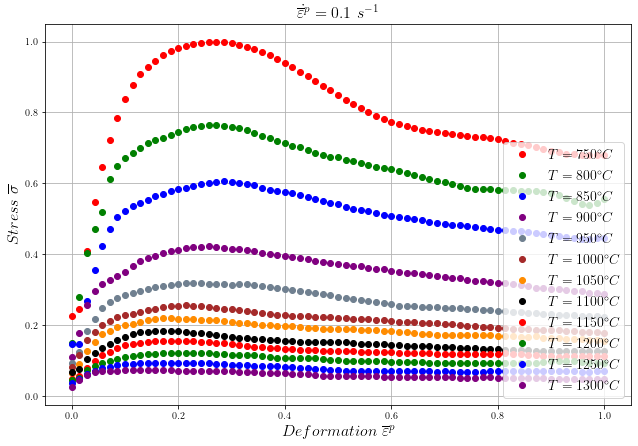

In [14]:
for epspv, epspvv in zip(epsp, epspOrig):
    plt.figure(figsize = (10.5, 7))
    plt.rc('text', usetex = True)
    cl = 0
    for T, TOrig in zip(temperatures, temperaturesOrig):
        # filter on T
        data = NNentries[(entries[:,colT]==T) & (entries[:,colEpsp]==epspv), :]
        # Plot the curves
        plt.plot(data[:,colEps], data[:,colSig], colors[cl], label=r'$T=' + str(TOrig) + '^{\circ}C$', marker = 'o', linestyle='none')
        cl += 1
    plt.legend(loc = 'lower right',fancybox = True, numpoints = 1, fontsize = 14)
    plt.grid() # Plot the grid with default size
    plt.xlabel(r'$Deformation\ \overline{\varepsilon}^{p}$', fontsize = 16) # Labels the x axis
    plt.ylabel(r'$Stress\ \overline{\sigma}$', fontsize = 16) # Labels the y axis
    plt.title(r'$\dot{\overline{\varepsilon}^p}=' + str(epspvv) + '\ s^{-1}$', fontsize = 16) # Self explicit command
    plt.savefig('OriginalData-epsp-'+str(epspvv)+'.svg', bbox_inches = 'tight', pad_inches = 0)
    plt.show()

## Mise en forme des données pour le RNN

In [15]:
NNinput = NNentries[:,colEps:colSig]
NNoutput = NNentries[:,colSig]
NNinput.shape, NNoutput.shape

((2556, 3), (2556,))

Construction du Réseau de Neurones

In [16]:
# Importation de TensorFlow 
import numpy as np
from keras.models import Sequential
from keras.metrics import MeanSquaredError
from keras.layers.core import Dense, Activation
from keras import optimizers

In [17]:
models = []
convergenceCurves = []
modelsDescription = []

In [18]:
#FACT = ['relu', 'sigmoid', 'tanh']
#COUCH = [3, 5, 7, 9]
FACT = ['tanh']
COUCH = [5, 7, 9, [5,2], [5,3], [5,4]]
for c in COUCH:
    for f in FACT:
        desc = '3'
        model = Sequential()
        if type(c) == list:
            for k in c:
                model.add(Dense(k, input_dim=3, activation=f))
                desc += '-' + str(k)
        else:
            model.add(Dense(c, input_dim=3, activation=f))
            desc += '-' + str(c)
        model.add(Dense(1))
        models.append(model)
        desc += '-1-'+f
        modelsDescription.append(desc)

In [19]:
for model in models:
    model.compile(loss='mean_squared_error', optimizer='adam', metrics=['accuracy'])

In [20]:
#model.compile(loss='mean_squared_error', optimizer='adam', metrics=['accuracy'])
#model.compile(loss='mse', optimizer='adams', metrics=[MeanSquaredError()])

In [ ]:
j = 1
iterations = 30
for model in models:
    hist = np.array([])
    print("MODEL :", modelsDescription[j-1])
    for i in range(iterations):
        history = model.fit(NNinput, NNoutput, epochs=1000, verbose=0)
        loss = history.history['loss']
        hist = np.append(hist,loss[::10])
        print("Iteration :", i+1, "/",iterations,"->",loss[-1],"         ", end='\r')
    print("\n")
    convergenceCurves.append(hist)
    j+=1

MODEL : 3-5-1-tanh


In [ ]:
plt.figure(figsize = (15.2, 10.75))
plt.rc('text', usetex = True)
i=0
x = np.linspace(0,10*len(convergenceCurves[0]),len(convergenceCurves[0]))
for model in models:
    plt.plot(x, convergenceCurves[i], label=modelsDescription[i], linewidth=3)
    i+=1
plt.grid() # Plot the grid with default size
plt.xlabel(r'$Iteration$', fontsize = 16) # Labels the x axis
plt.ylim(0, 5e-3)
plt.ylabel(r'$Quadratic\ Error\ \Delta E$', fontsize = 16) # Labels the y axis
plt.title(r'$Global\ convergence\ of\ the\ Neural\ Network$', fontsize = 16) # Self explicit command
plt.legend(loc = 'upper right',fancybox = True, numpoints = 1, fontsize = 14)
plt.savefig('Convergence.svg', bbox_inches = 'tight', pad_inches = 0)
plt.show()

In [ ]:
i=0
for model in models:
    predictedOutput = model.predict(NNinput)
    plotPredicted=predictedOutput.reshape(nEpsp*nTemp, nEps).T
    plotPredicted
    pcol = 0
    plt.figure(figsize = (20, 25))
    plt.rc('text', usetex = True)
    idx = 1
    plt.subplots_adjust(hspace = 0.3)
    for T, TOrig in zip(temperatures, temperaturesOrig):
        cl = 0
        pli = 0
        plt.subplot(4, 3, idx)
        for epspv, epspvAff in zip(epsp, epspOrig):
            # filter on T
            data = NNentries[(entries[:,colT]==T) & (entries[:,colEpsp]==epspv), :]
            # Plot the curves
            plt.plot(data[:,colEps], data[:,colSig], colors[cl], label=r'$\dot{\overline{\varepsilon}^p}=' + str(epspvAff) + '\ s^{-1}$', marker = 'o', linestyle='none')
            plt.plot(data[:,colEps], plotPredicted[:,pcol*nEpsp+pli], colors[cl], linewidth = 3)
            cl += 1
            pli += 1
        pcol += 1
        plt.legend(loc = 'lower right',fancybox = True, numpoints = 1, fontsize = 14)
        plt.grid() # Plot the grid with default size
        plt.xlabel(r'$Deformation\ \overline{\varepsilon}^{p}$', fontsize = 16) # Labels the x axis
        plt.ylabel(r'$Stress\ \overline{\sigma}$', fontsize = 16) # Labels the y axis
        plt.title(r'$NN-'+modelsDescription[i] +'-'+ str(TOrig) + '^{\circ}C$', fontsize = 16) # Self explicit command
        idx += 1
    plt.savefig('NN-'+modelsDescription[i]+'-1.svg', bbox_inches = 'tight', pad_inches = 0)
    plt.show()
    i+=1

In [ ]:
i=0
for model in models:
    predictedOutput = model.predict(NNinput)
    plotPredicted=predictedOutput.reshape(nEpsp*nTemp, nEps).T
    plotPredicted
    pcol = 0
    plt.figure(figsize = (20, 20))
    plt.rc('text', usetex = True)
    idx = 1
    plt.subplots_adjust(hspace = 0.3)
    for epspv, epspvAff in zip(epsp, epspOrig):
        cl = 0
        pli = 0
        plt.subplot(2, 2, idx)
        for T, TOrig in zip(temperatures, temperaturesOrig):
            # filter on T
            data = NNentries[(entries[:,colT]==T) & (entries[:,colEpsp]==epspv), :]
            # Plot the curves
            plt.plot(data[:,colEps], data[:,colSig], colors[cl], label=r'$T=' + str(TOrig) + '^{\circ}C$', marker = 'o', linestyle='none')
            plt.plot(data[:,colEps], plotPredicted[:,pcol+nEpsp*pli], colors[cl], linewidth = 3)
            cl += 1
            pli += 1
        pcol += 1
        plt.legend(loc = 'lower right',fancybox = True, numpoints = 1, fontsize = 14)
        plt.grid() # Plot the grid with default size
        plt.xlabel(r'$Deformation\ \overline{\varepsilon}^{p}$', fontsize = 16) # Labels the x axis
        plt.ylabel(r'$Stress\ \overline{\sigma}$', fontsize = 16) # Labels the y axis
        plt.title(r'$\dot{\overline{\varepsilon}^p}=' + str(epspvAff) + '\ s^{-1}$', fontsize = 16) # Self explicit command
#plt.title(r'$NN-'+modelsDescription[i] +'-\dot{\overline{\varepsilon}^p}='+ str(epspvAff) + '\ s^{-1}$', fontsize = 16) # Self explicit command
        idx += 1
    plt.savefig('NN-'+modelsDescription[i]+'-2.svg', bbox_inches = 'tight', pad_inches = 0)
    plt.show()
    i+=1